# Importing the libraries 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Importing the data

Loading the data using pandas and initialized to df variable.Here i am printing the top 5 rows in the data

In [2]:
df=pd.read_csv("C:/Users/Dell/OneDrive/Desktop/pr/facebook user data.csv")
df.head()

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
0,2094382,14,19,1999,11,male,266.0,0,0,0,0,0,0,0,0
1,1192601,14,2,1999,11,female,6.0,0,0,0,0,0,0,0,0
2,2083884,14,16,1999,11,male,13.0,0,0,0,0,0,0,0,0
3,1203168,14,25,1999,12,female,93.0,0,0,0,0,0,0,0,0
4,1733186,14,4,1999,12,male,82.0,0,0,0,0,0,0,0,0


Here we have 15 columns and 99004 rows are there in the given data.Firstly, we are finding the null values in the data by using "isnull()".

In [3]:
df.isnull().sum()

userid                     0
age                        0
dob_day                    0
dob_year                   0
dob_month                  0
gender                   175
tenure                     2
friend_count               0
friendships_initiated      0
likes                      0
likes_received             0
mobile_likes               0
mobile_likes_received      0
www_likes                  0
www_likes_received         0
dtype: int64

Here we can observe ,in gender column we have 175 missing values are present and also in tenure we have only 2 missing values present in the data.

# Imputation of missing values

In [4]:
df.gender.value_counts()

male      58574
female    40254
Name: gender, dtype: int64

By using value_counts method we find that there are 58574 males and 40254 females are in the data.

Gender variable contains categorical values ,imputing the null values for the categorical feature with thier median and mode are used . Here mode and median are giving same value i.e male. So i imputing null value with mode .Here mode value is male because male is more number of times repeated.
By using "fillna()" we can fill the null values..

In [5]:
df.gender.fillna(value='male',inplace=True)

Here we have to use "inplace=True" then the changes are effected to the data otherwise it won't effect the changes.

In [6]:
df.gender.value_counts()

male      58749
female    40254
Name: gender, dtype: int64

Here we can observe that all null values are replaced with "male" .

<AxesSubplot:xlabel='tenure'>

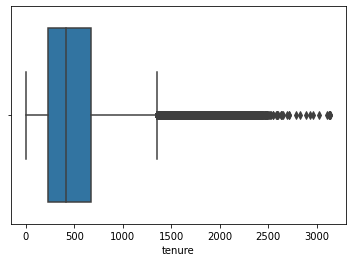

In [7]:
sns.boxplot(df.tenure)

From the boxplot, we observe that the data has more number of outliers .Without effecting the outliers for imputing the null values median is more suitable. Because median is less effected by the outliers.

In [8]:
med=df.tenure.median()
med

412.0

In [9]:
df['tenure'].fillna(value=med,inplace=True)

In [10]:
df.isnull().sum()

userid                   0
age                      0
dob_day                  0
dob_year                 0
dob_month                0
gender                   0
tenure                   0
friend_count             0
friendships_initiated    0
likes                    0
likes_received           0
mobile_likes             0
mobile_likes_received    0
www_likes                0
www_likes_received       0
dtype: int64

Here we conclude that there are no null values present in the data

# Heatmap

In [11]:
cor=df.corr()

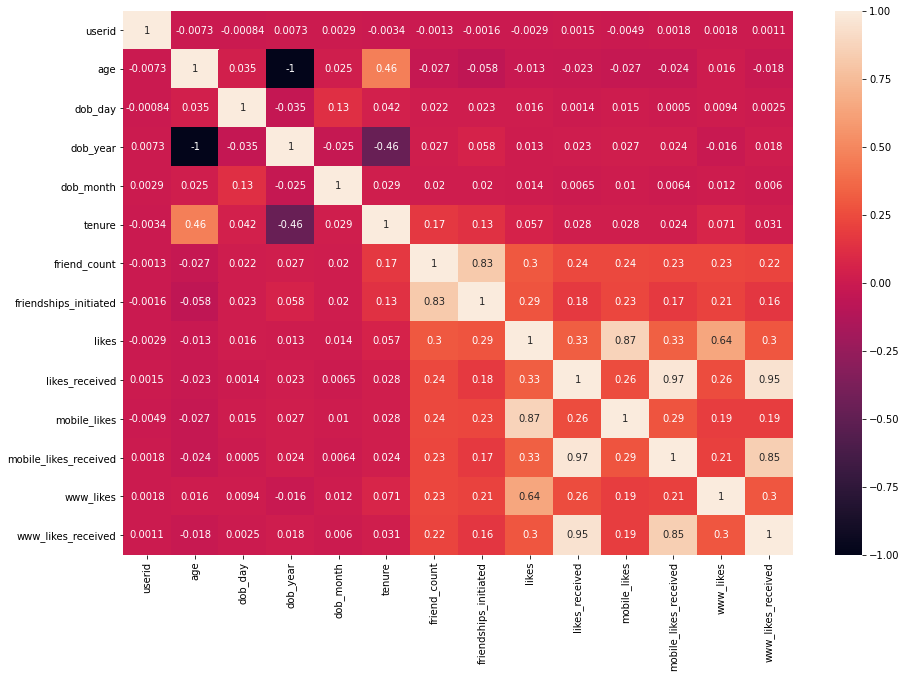

In [12]:
plt.figure(figsize=(15,10))
sns.heatmap(cor,annot=True)
plt.show()

# Analysis based on gender

In [13]:
df.gender.value_counts(normalize=True)

male      0.593406
female    0.406594
Name: gender, dtype: float64

Composition of males users is 59% and females users is 41%.

In [14]:
x= df[df['gender']=='male'].sum()['friend_count']
y=df[df['gender']=='female'].sum()['friend_count']
x,y

(9699059, 9740258)

we see that female has more number of friends.

In [15]:
x= df[df['gender']=='male'].sum()['friendships_initiated']
y= df[df['gender']=='female'].sum()['friendships_initiated']
x,y

(6053223, 4584894)

In gender category, males are initated more number of friendships

<AxesSubplot:xlabel='gender', ylabel='tenure'>

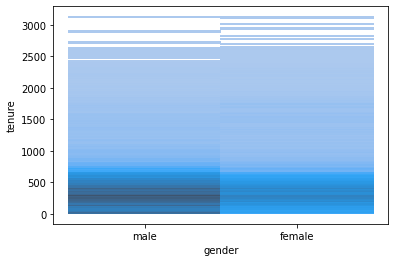

In [16]:
sns.histplot(x='gender',y='tenure',data=df)

# Analysis based on least active users on facebook

In [17]:
df2=df[df['friend_count']==0]
print(len(df2))

1962


There are 1962 users have no friends.
Here i choose a dataframe that friend_count is zero and assigned to a new variable df2. And find the length of the dataframe.We can use another method i.e value_counts it gives the total of each category. In that approach we have to look the value of 0 i.e 1962.

In [18]:
df['friend_count'].value_counts()

0       1962
1       1816
2       1117
3        860
5        789
        ... 
1808       1
1744       1
3729       1
1680       1
2047       1
Name: friend_count, Length: 2562, dtype: int64

In [19]:
df['likes'].value_counts()

0       22308
1        6928
2        4434
3        3240
4        2507
        ...  
5591        1
3668        1
1685        1
1749        1
2047        1
Name: likes, Length: 2924, dtype: int64

22308 users did not like any posts

In [20]:
df['likes_received'].value_counts()

0       24428
1        7305
2        4541
3        3347
4        2669
        ...  
1113        1
3224        1
1305        1
1369        1
2047        1
Name: likes_received, Length: 2681, dtype: int64

24428 users did not get any likes

# Analysis based on users accessibility

In [21]:
df3=df.groupby('gender').mean()[['mobile_likes','www_likes']]
df3

,mobile_likes,www_likes
gender,,
female,172.912928,87.138297
male,60.348176,24.490034


In [22]:
df4=df.groupby('gender').mean()[['mobile_likes_received','www_likes_received']]
df4

,mobile_likes_received,www_likes_received
gender,,
female,147.100884,104.334451
male,40.967199,27.210863
